In [1]:
import sys,os,time,cv2
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
#torch.multiprocessing.set_sharing_strategy('file_system')

import ops
from resnet import resnet18 as resnet
from batch_Friends import Friends_dataset
from data_loader import Emotion_dataset
from utils import get_dtstr, emo2txt

# restore net
net = resnet().cuda()
chkpt_file = sorted(os.listdir(ops.chkpt_path))[-1]
ckpt = torch.load(ops.chkpt_path+chkpt_file)
net.load_state_dict(ckpt['model_state_dict'])
print chkpt_file

chkpt_1911260226_110000.tar


In [2]:
emo_db = Emotion_dataset(ops)
db_load = DataLoader(dataset=emo_db, batch_size=ops.batch_size, num_workers=4)


neutral
neutral


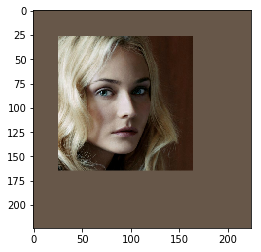

In [3]:
for i, bat in enumerate(db_load, 0):
    img, emo = bat[0], bat[1]
    break

img_np = img.permute(0,2,3,1).numpy()
idx = 0
plt.imshow(img_np[idx])
print emo2txt(emo[idx].nonzero()[0][0])

emo_out = net.forward(img.cuda())
emo_max = emo_out.argmax(dim=1)
print emo2txt(emo_max[idx].detach().cpu().numpy())

In [4]:
# import face_recognition

# im = (255*img[0]).numpy().transpose(1,2,0).astype(np.uint8)
# face_loc = np.array(face_recognition.face_locations(im)[0]).astype(int)

# im_bb = cv2.rectangle(im.copy(), (face_loc[3], face_loc[0]), (face_loc[1], face_loc[2]), (255,255,0), 3)
# plt.imshow(im_bb)

In [5]:
from batch_Friends_img import Friends_dataset
emo_db = Friends_dataset(ops)
db_load = DataLoader(dataset=emo_db, batch_size=ops.batch_size, num_workers=4)


disgust


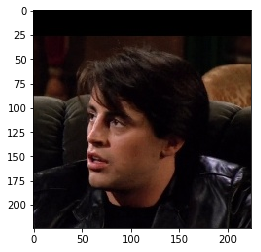

In [6]:
for i, bat in enumerate(db_load, 0):
    img, emo = bat[0], bat[1]
    break
img_np = img[0].permute(0,2,3,1).numpy()
idx = 0
plt.imshow(img_np[idx])
print emo2txt(emo[0][idx].nonzero()[0][0])


In [7]:
from resnet_tsm import resnet18 as resnet


In [8]:
net = resnet()

In [10]:
net.forward(torch.rand(4,4,3,224,224)).shape

torch.Size([4, 4, 7])